In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
!pip install nltk wordcloud seaborn transformers

In [4]:
import numpy as np
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch

In [5]:
Hinglish_df = pd.read_csv('conversations.csv')
English_df = pd.read_csv("English Conversations.csv")
max_size = len(Hinglish_df)
English_df = English_df[:max_size]
Hinglish_df

,Conversation
0,Hey Radhika! Kaisi ho?
1,"Hey Rohan, main bilkul thik hun. Tu bata, kais..."
2,"I'm good too, yaar. Tumne suna ki next week sc..."
3,"Haan, mujhe toh pata chal gaya hai. Itna excit..."
4,"Bilkul, Radhika. Ek trip miss karunga toh beha..."
...,...
34879,"Of course, DSLR leke jayenge aur tere liye kuc..."
34880,Tumhara photography passion bahut impressive h...
34881,"Thanks, Kavya! Tumhari smile aur tumhare chehr..."
34882,"Rahul, tum bade sweet ho. Tumhe kaise pata cha..."


In [6]:
English_df 

,Message
0,Are you a fan of Google or Microsoft?
1,Both are excellent technology they are helpful...
2,"I'm not a huge fan of Google, but I use it a ..."
3,Google provides online related services and pr...
4,"Yeah, their services are good. I'm just not a ..."
...,...
34879,Well they did get to win back-to-back titles a...
34880,I remember the finals. curry became the first ...
34881,yes he led the league in scoring while shootin...
34882,Do you like the NBA?


In [7]:
English_df["Conversation"] = English_df["Message"]
English_df = English_df.drop(columns={"Message"})

In [8]:
np_ones = np.ones((max_size,),int)
np_zeros = np.zeros((max_size,),int)
np_ones

array([1, 1, 1, ..., 1, 1, 1])

In [9]:
Hinglish_df['Class'] = np_ones
English_df['Class'] = np_zeros

In [10]:
df = pd.concat([Hinglish_df,English_df],axis=0)
df

,Conversation,Class
0,Hey Radhika! Kaisi ho?,1
1,"Hey Rohan, main bilkul thik hun. Tu bata, kais...",1
2,"I'm good too, yaar. Tumne suna ki next week sc...",1
3,"Haan, mujhe toh pata chal gaya hai. Itna excit...",1
4,"Bilkul, Radhika. Ek trip miss karunga toh beha...",1
...,...,...
34879,Well they did get to win back-to-back titles a...,0
34880,I remember the finals. curry became the first ...,0
34881,yes he led the league in scoring while shootin...,0
34882,Do you like the NBA?,0


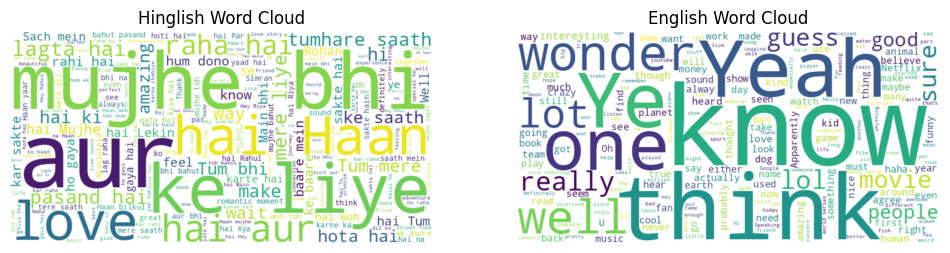

In [11]:
wordcloud_hinglish = WordCloud(width=800, height=400, background_color='white').generate(' '.join(Hinglish_df['Conversation']))
wordcloud_english = WordCloud(width=800, height=400, background_color='white').generate(' '.join(English_df['Conversation']))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_hinglish, interpolation='bilinear')
plt.title("Hinglish Word Cloud")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_english, interpolation='bilinear')
plt.title("English Word Cloud")
plt.axis("off")

plt.show()


In [12]:
hinglish_words = ' '.join(Hinglish_df['Conversation']).split()
hinglish_word_freq = Counter(hinglish_words)
English_words = ' '.join(English_df['Conversation']).split()
English_word_freq = Counter(English_words)

print(f"There are {len(hinglish_word_freq)} hinglish words and {len(English_word_freq)} english words in given dataset")

There are 31298 hinglish words and 40835 english words in given dataset


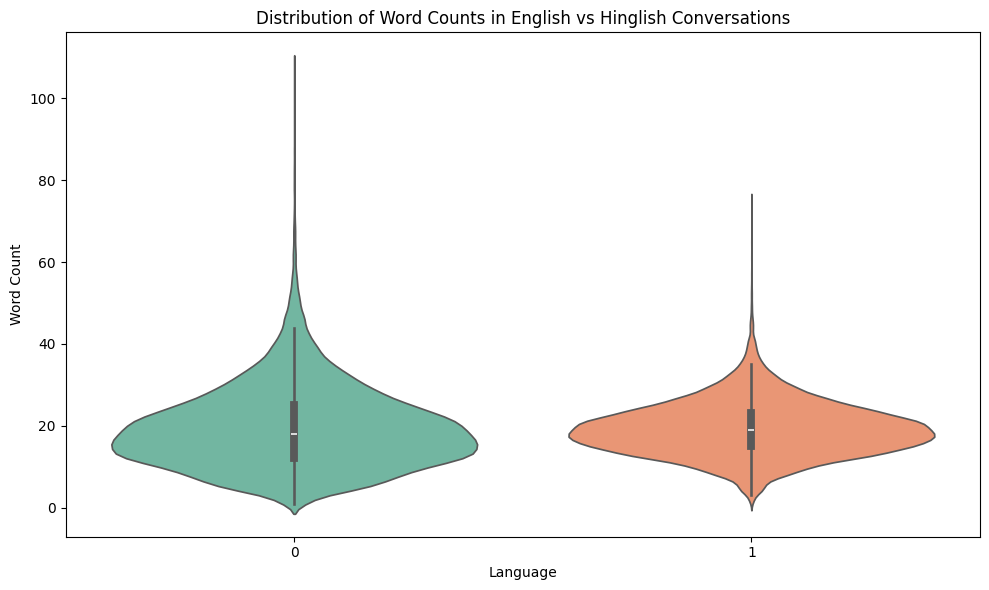

In [13]:
temp = pd.DataFrame()
temp['Class'] = df['Class']
temp['Word_Count'] = df['Conversation'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Word_Count', data=temp, palette='Set2')

plt.title("Distribution of Word Counts in English vs Hinglish Conversations")
plt.xlabel("Language")
plt.ylabel("Word Count")
plt.tight_layout()

plt.show()

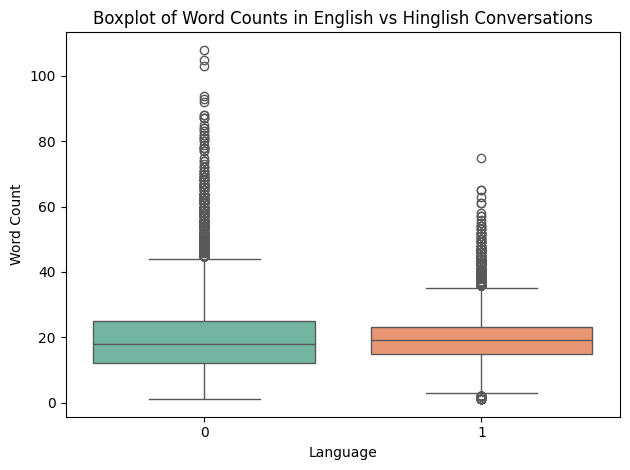

In [14]:
sns.boxplot(x='Class', y='Word_Count', data=temp, palette='Set2')
plt.title('Boxplot of Word Counts in English vs Hinglish Conversations')
plt.xlabel('Language')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()


In [15]:
df.describe()

,Class
count,69768.000000
mean,0.500000
std,0.500004
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69768 entries, 0 to 34883
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Conversation  69768 non-null  object
 1   Class         69768 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [17]:
df.isnull().sum()

Conversation    0
Class           0
dtype: int64

In [18]:
df_shuffled = df.sample(frac=1,random_state=13).reset_index(drop=True)

In [19]:
df_shuffled

,Conversation,Class
0,Kyunki tumhari aankhon mein bhi main apne sapn...,1
1,"Hey Aaradhya, how's it going?",1
2,I don't know. I 've seen solar equipment from ...,0
3,"Yeah, they really had to eat their judgement. ...",0
4,"Yeah I know, he did a great job for the limite...",0
...,...,...
69763,"Really, I didn't know they like Jazz, that's i...",0
69764,"Chalo, Aarav. Yeh raat hamesha special rahegi,...",1
69765,Yes! I got so excited about the trees that I d...,0
69766,"That's true, Meeta. ICSE allows students to ch...",1


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_shuffled["Conversation"], df_shuffled["Class"], test_size=0.2, random_state=42
)

In [21]:
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")
model = BertForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
def tokenize_function(texts, labels):
    encodings = tokenizer(list(texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
    encodings["labels"] = torch.tensor(list(labels))
    return encodings

train_encodings = tokenize_function(X_train, Y_train)
test_encodings = tokenize_function(X_test, Y_test)

class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        return {key: tensor[idx] for key, tensor in self.encodings.items()}

train_dataset = TextDataset(train_encodings)
test_dataset = TextDataset(test_encodings)


In [23]:
pip install -U accelerate

Note: you may need to restart the kernel to use updated packages.


In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="binary")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    seed=42
)


In [25]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.016700,0.029074,0.993335,0.993359,0.998421,0.988347
2,0.000300,0.020464,0.994912,0.994965,0.993063,0.996874


TrainOutput(global_step=6978, training_loss=0.023981309814282765, metrics={'train_runtime': 2288.0177, 'train_samples_per_second': 48.788, 'train_steps_per_second': 3.05, 'total_flos': 7342640221931520.0, 'train_loss': 0.023981309814282765, 'epoch': 2.0})

In [26]:
trainer.evaluate()

{'eval_loss': 0.02046412229537964,
 'eval_accuracy': 0.9949118532320481,
 'eval_f1': 0.9949648961066591,
 'eval_precision': 0.9930634201585504,
 'eval_recall': 0.996873667756146,
 'eval_runtime': 84.4566,
 'eval_samples_per_second': 165.221,
 'eval_steps_per_second': 10.337,
 'epoch': 2.0}

In [33]:
new_texts = [
    "I am going to the market now",           # Pure English
    "Yeh movie bahut achhi thi",              # Pure Hinglish
    "Can we meet tomorrow at 5 PM?",          # Pure English
    "Mujhe samajh nahi aa raha hai",          # Pure Hinglish
    "Let's go to the park and enjoy",         # Pure English
    "Kya aap mujhe call karenge?",            # Pure Hinglish
    "The weather is so pleasant today",       # Pure English
    "Yahan ka mausam bahut hi sundar hai",    # Pure Hinglish
    "I don't understand yeh kya ho raha hai", # Code-mixed (English + Hinglish)
    "Kal hum ghoomne chalenge, okay?",        # Code-mixed (Hinglish + English)
    "It's raining cats and dogs!",            # Pure English idiom
    "Bhai, yeh amazing hai!",                 # Hinglish with slang
    "Let's plan for a trip, kya bolte ho?",   # Code-mixed
    "Main school ja raha hoon",               # Pure Hinglish
    "I love programming in Python",           # Pure English
    "Tu kya kar raha hai?",                   # Pure Hinglish
    "Are you coming to the party?",           # Pure English
    "Tumhara response kya hoga is baat par?", # Pure Hinglish
    "This is so fascinating!",                # Pure English
    "Kuch samajh nahi aa raha, help karna",   # Hinglish with a request
]

new_encodings = tokenizer(new_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
new_encodings = {key: value.to(device) for key, value in new_encodings.items()}

predictions = model(**new_encodings)
predicted_labels = torch.argmax(predictions.logits, axis=1).tolist()



print("Predicted Labels:", predicted_labels)  # 0 = English, 1 = Hinglish

Predicted Labels: [0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1]
